<a href="https://colab.research.google.com/github/shroukdiaa/ML_tasks/blob/main/task_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import required library


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read the dataset


In [2]:
df = pd.read_csv("/content/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


#check number of rows and number of columns


In [3]:
df.shape

(47, 2)

#check dataset information


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [5]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


#check any missing values


In [6]:
df.isnull().sum()

,0
year,0
per capita income (US$),0


#any outliers


In [7]:
df.skew()

,0
year,0.000000
per capita income (US$),0.710906


In [8]:
df.kurt()

,0
year,-1.200000
per capita income (US$),-0.708445


#check any correlation and covariance


In [9]:
df[['year','per capita income (US$)']].cov()

,year,per capita income (US$)
year,188.000000,1.557514e+05
per capita income (US$),155751.434142,1.448335e+08


In [10]:
df.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


#Visualization

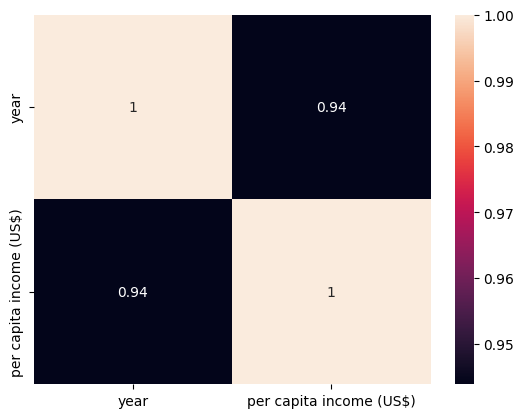

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

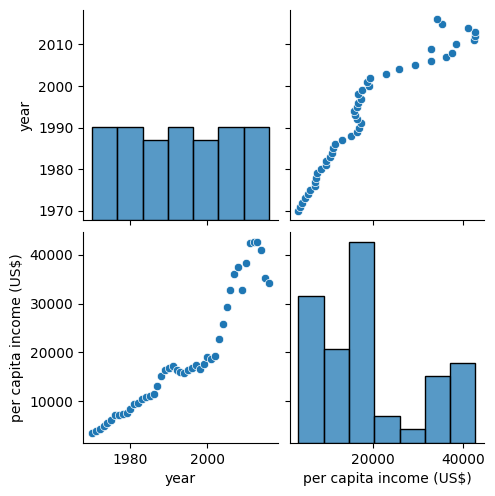

In [12]:
sns.pairplot(df)
plt.show()

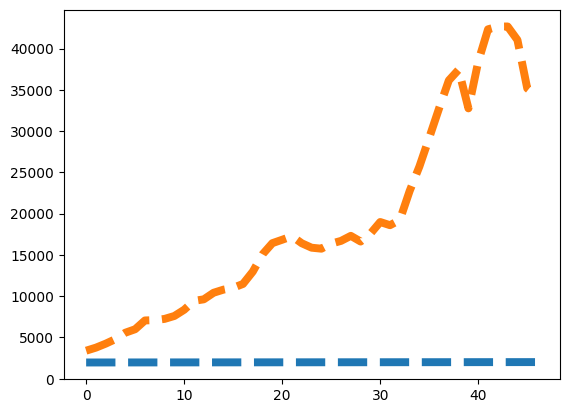

In [13]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

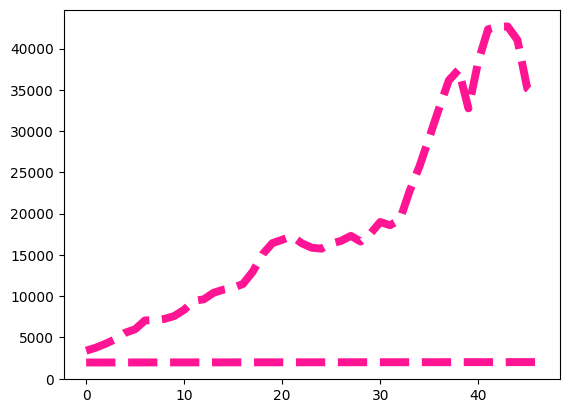

In [14]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

Next Plot is Line Plot using data directly.

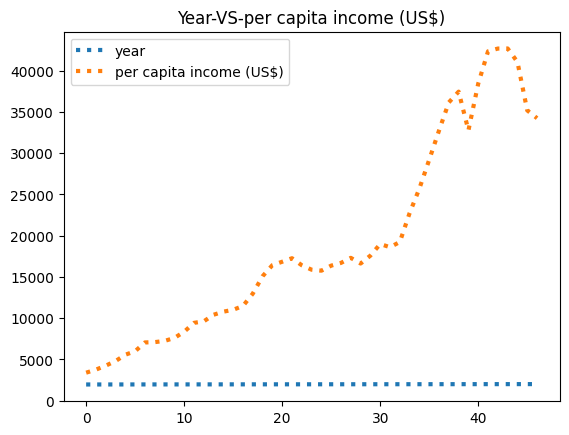

In [15]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('Year-VS-per capita income (US$)')
plt.show()

#Plot a Specific Column

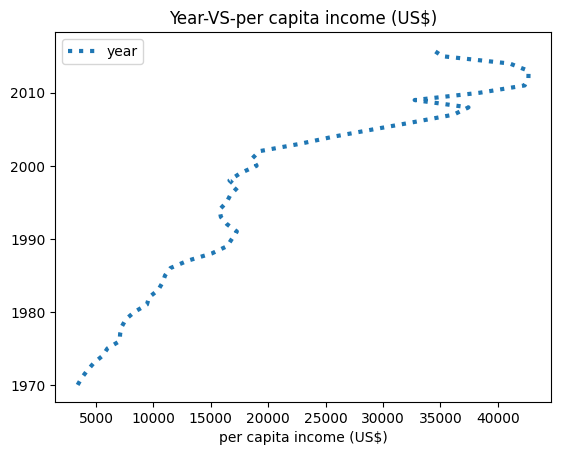

In [16]:
df = pd.DataFrame(data=df)

df.plot.line(x='per capita income (US$)',linestyle = ':', linewidth='3')

plt.title('Year-VS-per capita income (US$)')
plt.show()

#Independent and Dependent Variables


In [17]:
X=df.drop('per capita income (US$)',axis=1)

In [19]:
y = df['per capita income (US$)']

In [20]:
X.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [21]:
y.head()

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


#Splitting the data



In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [25]:
print(X_train.shape)

(32, 1)


In [26]:
X_test.shape

(15, 1)

#Model Fitting

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LR=LinearRegression()

In [29]:
LR.fit(X_train,y_train)

LinearRegression()

In [30]:
LR.intercept_   # beta 0

-1669472.865154086

In [31]:
LR.coef_        # beta 1

array([847.51723132])

# Prediction

In [32]:
y_pred=LR.predict(X_test)

In [33]:
y_pred

array([23866.56302985, 28104.14918647, 25561.5974925 ,  3526.14947809,
       15391.39071662,  9458.77009735, 35731.80426838, 26409.11472382,
       18781.45964191,  8611.25286603, 23019.04579853, 27256.63195514,
       24714.08026117, 36579.3214997 ,  1831.11501545])

In [34]:
y_test

,per capita income (US$)
28,16622.671870
33,22739.426280
30,18987.382410
4,5576.514583
18,15080.283450
11,9434.390652
42,42665.255970
31,18601.397240
22,16412.083090
10,8355.968120


# Evaluation

In [35]:
from sklearn import metrics

In [36]:
R2=metrics.r2_score(y_test,y_pred)
R2

0.7537443860326112

In [37]:
print(metrics.mean_absolute_error(y_test,y_pred))

4554.501290185437


In [38]:
print(metrics.mean_squared_error(y_test,y_pred))

28958469.97293359


In [43]:
print(LR.predict([[4]]))

[-1666082.79622879]


# Assumptions

In [44]:
error= y_test-y_pred
error

,per capita income (US$)
28,-7243.891160
33,-5364.722906
30,-6574.215082
4,2050.365105
18,-311.107267
11,-24.379445
42,6933.451702
31,-7807.717484
22,-2369.376552
10,-255.284746


# No Autocorrelation



In [45]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

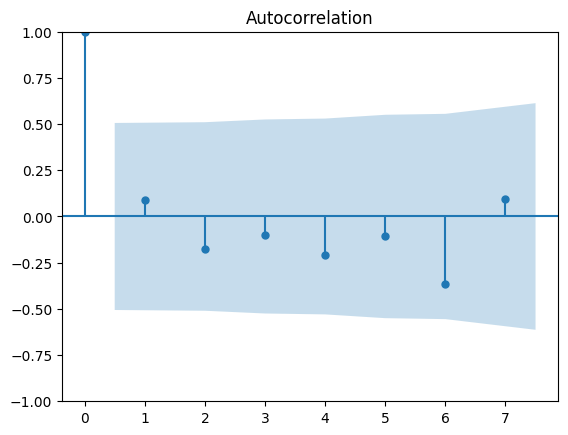

In [46]:
acf=plot_acf(error)
plt.show()

# Normality

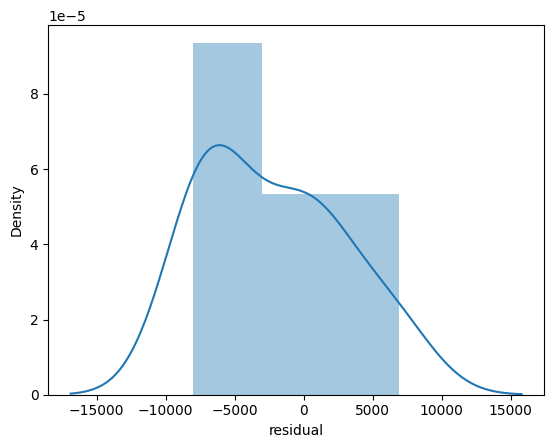

In [47]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

# Linearity

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
data = pd.DataFrame({'X': X.squeeze(), 'y': y})

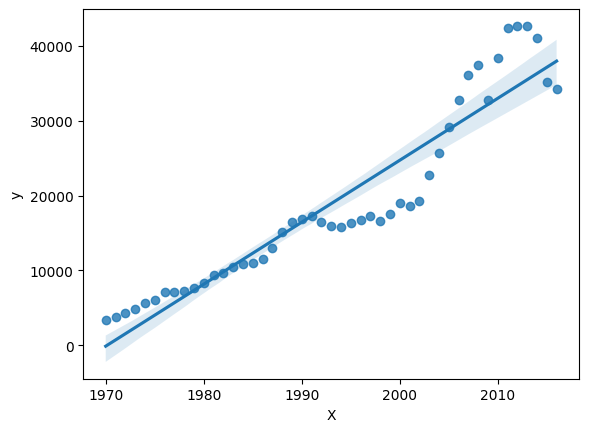

In [53]:
sns.regplot(x='X', y='y', data=data)
plt.show()

# Homoscedasticity



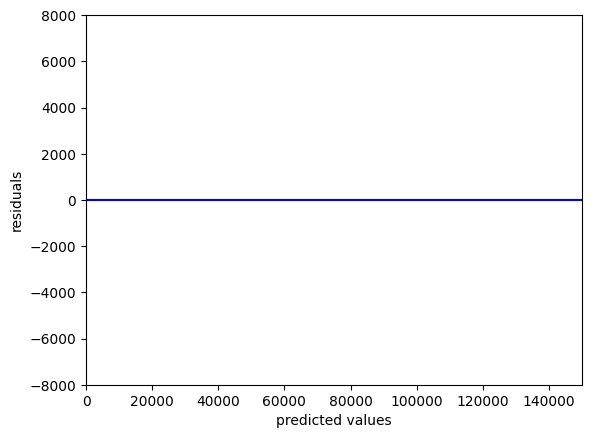

In [55]:
sns.lineplot(x=[0,150000],y=[0,0],color='blue')
# The data for x and y should be provided as keyword arguments to the lineplot function.
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])

plt.show()

# Multicollinearity

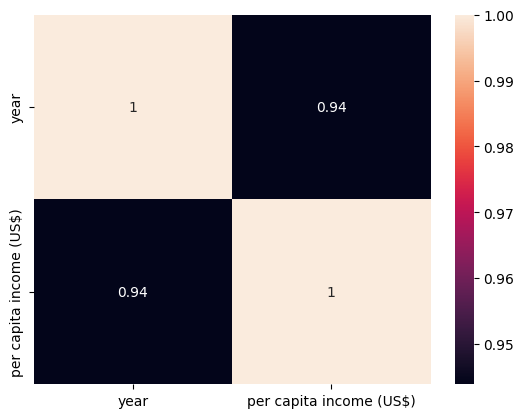

In [56]:
sns.heatmap(df.corr(),annot=True)
plt.show()